In [2]:
# import libraries

import pandas as pd
import xarray as xr
import numpy as np
from pathlib import Path
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
# read in files

folderpath = '../data/data_frames/'
paths = Path(folderpath).glob('bootstrap*.csv')
pathlist = list(paths)
data = pd.concat(map(pd.read_csv, pathlist), ignore_index=True)
data

,Unnamed: 0,time,row,col,crs,team_icecon,bootstrap_icecon,edtl,visual_ice,ocean_fraction,land_fraction,snow_fraction,sun_elevation,cloud_cover,pixels,x,y
0,1603394,2019-01-12,346,98,b'',0.940,0.953,2.236068,0.518772,0.105046,0.193481,0.182700,6.177596,2.87,652741.0,-1387500.0,-2812500.0
1,1603698,2019-01-12,347,98,b'',0.968,1.000,2.000000,0.385017,0.069531,0.439040,0.106412,6.177596,2.87,651683.0,-1387500.0,-2837500.0
2,1603699,2019-01-12,347,99,b'',0.972,1.000,2.236068,0.955612,0.043312,0.001042,0.000034,6.177596,2.87,652380.0,-1362500.0,-2837500.0
3,1604003,2019-01-12,348,99,b'',0.976,1.000,1.414214,0.988944,0.011056,0.000000,0.000000,6.177596,2.87,540447.0,-1362500.0,-2862500.0
4,1604004,2019-01-12,348,100,b'',0.980,1.000,2.236068,0.994977,0.005023,0.000000,0.000000,6.177596,2.87,64698.0,-1337500.0,-2862500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191144,48990872,2017-12-26,322,56,b'',0.908,1.000,5.385165,0.977938,0.022062,0.000000,0.000000,5.929697,3.21,186064.0,-2437500.0,-2212500.0
191145,48990873,2017-12-26,322,57,b'',0.924,1.000,5.830952,1.000000,0.000000,0.000000,0.000000,5.929697,3.21,7014.0,-2412500.0,-2212500.0
191146,48995889,2017-12-26,338,209,b'',0.000,0.000,4.123106,0.002214,0.997786,0.000000,0.000000,3.373443,1.54,263755.0,1387500.0,-2612500.0
191147,48995890,2017-12-26,338,210,b'',0.000,0.000,5.000000,0.000044,0.999956,0.000000,0.000000,3.373443,1.54,182265.0,1412500.0,-2612500.0


In [4]:
# some general things

data['visual_ice'] = data['visual_ice'] * 100
data['team_icecon'] = data['team_icecon'] * 100
data['bootstrap_icecon'] = data['bootstrap_icecon'] * 100
data['ocean_fraction'] = data['ocean_fraction'] * 100
data['snow_fraction'] = data['snow_fraction'] * 100
data['land_fraction'] = data['land_fraction'] * 100
data['date'] = pd.to_datetime(data['time'], yearfirst=True)
data = data.drop(columns=['Unnamed: 0', 'crs', 'time'])

# get iceconcentration from LANDSAT

data['visual_icecon'] = ( data['visual_ice'] / (data['visual_ice'] + data['ocean_fraction']) ) * 100
data = data.dropna(subset=['visual_icecon'])
data

,row,col,team_icecon,bootstrap_icecon,edtl,visual_ice,ocean_fraction,land_fraction,snow_fraction,sun_elevation,cloud_cover,pixels,x,y,date,visual_icecon
0,346,98,94.0,95.3,2.236068,51.877238,10.504626,19.348103,18.270034,6.177596,2.87,652741.0,-1387500.0,-2812500.0,2019-01-12,83.160769
1,347,98,96.8,100.0,2.000000,38.501695,6.953074,43.904015,10.641217,6.177596,2.87,651683.0,-1387500.0,-2837500.0,2019-01-12,84.703313
2,347,99,97.2,100.0,2.236068,95.561176,4.331218,0.104234,0.003372,6.177596,2.87,652380.0,-1362500.0,-2837500.0,2019-01-12,95.664116
3,348,99,97.6,100.0,1.414214,98.894434,1.105566,0.000000,0.000000,6.177596,2.87,540447.0,-1362500.0,-2862500.0,2019-01-12,98.894434
4,348,100,98.0,100.0,2.236068,99.497666,0.502334,0.000000,0.000000,6.177596,2.87,64698.0,-1337500.0,-2862500.0,2019-01-12,99.497666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191144,322,56,90.8,100.0,5.385165,97.793770,2.206230,0.000000,0.000000,5.929697,3.21,186064.0,-2437500.0,-2212500.0,2017-12-26,97.793770
191145,322,57,92.4,100.0,5.830952,100.000000,0.000000,0.000000,0.000000,5.929697,3.21,7014.0,-2412500.0,-2212500.0,2017-12-26,100.000000
191146,338,209,0.0,0.0,4.123106,0.221418,99.778582,0.000000,0.000000,3.373443,1.54,263755.0,1387500.0,-2612500.0,2017-12-26,0.221418
191147,338,210,0.0,0.0,5.000000,0.004389,99.995611,0.000000,0.000000,3.373443,1.54,182265.0,1412500.0,-2612500.0,2017-12-26,0.004389


In [5]:
# calculate pixel max for each year

# yearly_max = data.groupby(data['date'].dt.year)['pixels'].max()
# data['max'] = data['date'].dt.year.map(yearly_max)

# calculate pixel percentiles

data['pixel_percentile'] = (data['pixels'] / 730900)*100

# filter

data = data.loc[data['pixel_percentile'] > 80]
data

,row,col,team_icecon,bootstrap_icecon,edtl,visual_ice,ocean_fraction,land_fraction,snow_fraction,sun_elevation,cloud_cover,pixels,x,y,date,visual_icecon,pixel_percentile
0,346,98,94.0,95.3,2.236068,51.877238,10.504626,19.348103,18.270034,6.177596,2.87,652741.0,-1387500.0,-2812500.0,2019-01-12,83.160769,89.306471
1,347,98,96.8,100.0,2.000000,38.501695,6.953074,43.904015,10.641217,6.177596,2.87,651683.0,-1387500.0,-2837500.0,2019-01-12,84.703313,89.161718
2,347,99,97.2,100.0,2.236068,95.561176,4.331218,0.104234,0.003372,6.177596,2.87,652380.0,-1362500.0,-2837500.0,2019-01-12,95.664116,89.257080
6,318,68,82.4,98.7,3.000000,83.036456,8.527424,8.397380,0.038740,5.609157,4.63,658241.0,-2137500.0,-2112500.0,2019-01-16,90.686913,90.058968
7,318,69,88.0,95.3,3.162278,75.326665,3.846259,13.657738,7.169338,5.609157,4.63,659238.0,-2112500.0,-2112500.0,2019-01-16,95.141952,90.195376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191135,320,55,80.0,95.6,3.162278,99.294047,0.542695,0.163258,0.000000,5.929697,3.21,644377.0,-2462500.0,-2162500.0,2017-12-26,99.456418,88.162129
191136,320,56,84.0,100.0,3.605551,94.652789,5.347211,0.000000,0.000000,5.929697,3.21,645458.0,-2437500.0,-2162500.0,2017-12-26,94.652789,88.310029
191138,321,54,80.8,97.1,3.605551,98.271508,1.728492,0.000000,0.000000,5.929697,3.21,642641.0,-2487500.0,-2187500.0,2017-12-26,98.271508,87.924613
191139,321,55,84.4,100.0,4.123106,83.470470,16.529530,0.000000,0.000000,5.929697,3.21,643642.0,-2462500.0,-2187500.0,2017-12-26,83.470470,88.061568


In [6]:
# calculate error

data['team_error'] = data['team_icecon'] - data['visual_icecon']
data['bootstrap_error'] = data['bootstrap_icecon'] - data['visual_icecon']
data['rse_team'] = (data['team_error']**2)**0.5
data['rse_bootstrap'] = (data['bootstrap_error']**2)**0.5
data

,row,col,team_icecon,bootstrap_icecon,edtl,visual_ice,ocean_fraction,land_fraction,snow_fraction,sun_elevation,...,pixels,x,y,date,visual_icecon,pixel_percentile,team_error,bootstrap_error,rse_team,rse_bootstrap
0,346,98,94.0,95.3,2.236068,51.877238,10.504626,19.348103,18.270034,6.177596,...,652741.0,-1387500.0,-2812500.0,2019-01-12,83.160769,89.306471,10.839231,12.139231,10.839231,12.139231
1,347,98,96.8,100.0,2.000000,38.501695,6.953074,43.904015,10.641217,6.177596,...,651683.0,-1387500.0,-2837500.0,2019-01-12,84.703313,89.161718,12.096687,15.296687,12.096687,15.296687
2,347,99,97.2,100.0,2.236068,95.561176,4.331218,0.104234,0.003372,6.177596,...,652380.0,-1362500.0,-2837500.0,2019-01-12,95.664116,89.257080,1.535884,4.335884,1.535884,4.335884
6,318,68,82.4,98.7,3.000000,83.036456,8.527424,8.397380,0.038740,5.609157,...,658241.0,-2137500.0,-2112500.0,2019-01-16,90.686913,90.058968,-8.286913,8.013087,8.286913,8.013087
7,318,69,88.0,95.3,3.162278,75.326665,3.846259,13.657738,7.169338,5.609157,...,659238.0,-2112500.0,-2112500.0,2019-01-16,95.141952,90.195376,-7.141952,0.158048,7.141952,0.158048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191135,320,55,80.0,95.6,3.162278,99.294047,0.542695,0.163258,0.000000,5.929697,...,644377.0,-2462500.0,-2162500.0,2017-12-26,99.456418,88.162129,-19.456418,-3.856418,19.456418,3.856418
191136,320,56,84.0,100.0,3.605551,94.652789,5.347211,0.000000,0.000000,5.929697,...,645458.0,-2437500.0,-2162500.0,2017-12-26,94.652789,88.310029,-10.652789,5.347211,10.652789,5.347211
191138,321,54,80.8,97.1,3.605551,98.271508,1.728492,0.000000,0.000000,5.929697,...,642641.0,-2487500.0,-2187500.0,2017-12-26,98.271508,87.924613,-17.471508,-1.171508,17.471508,1.171508
191139,321,55,84.4,100.0,4.123106,83.470470,16.529530,0.000000,0.000000,5.929697,...,643642.0,-2462500.0,-2187500.0,2017-12-26,83.470470,88.061568,0.929530,16.529530,0.929530,16.529530


Notebook goes through a couple ways we handle this data, which on its own is too large and unwieldy and has way too many values at 1,1 and 0,0. This first section stratifies the sample using SRS and computes statistics

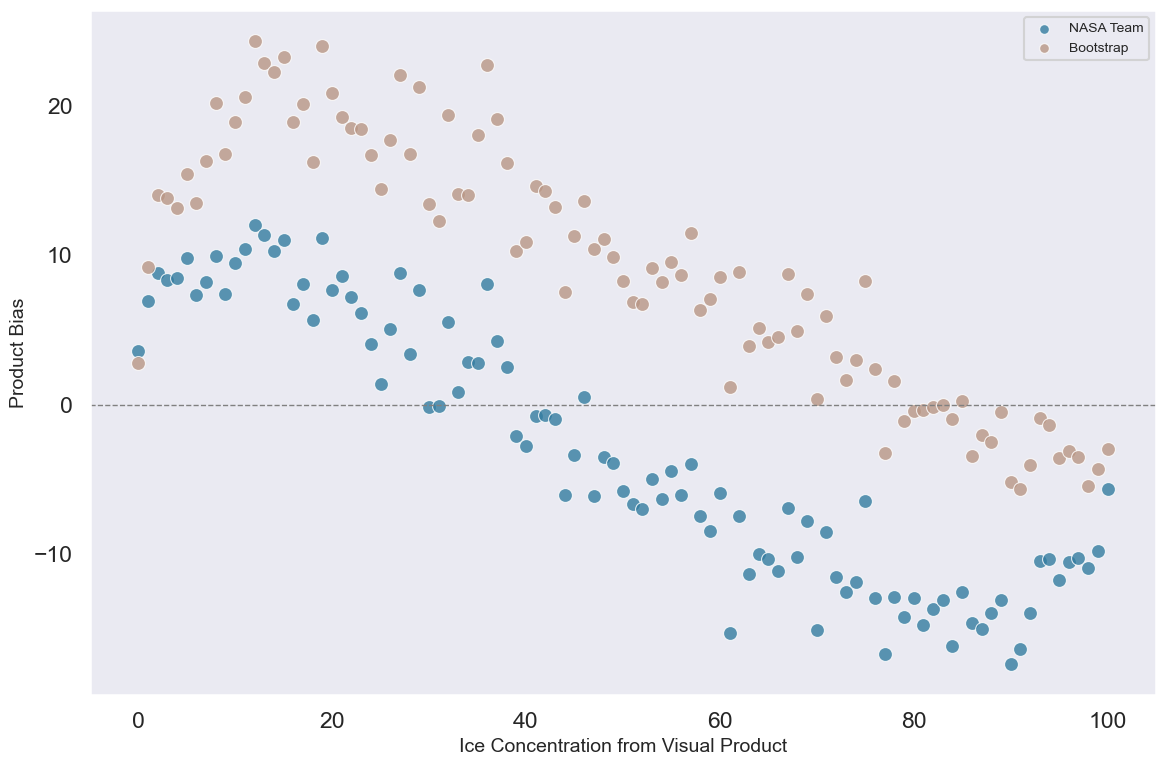

In [7]:
import warnings
warnings.filterwarnings('ignore')

# visual icecon vs error — stratified random sampling (SRS)

binned_visual = data.copy()
binned_visual['bin'] = (binned_visual['visual_icecon']).round().astype(int)
binned_visual['bin2'] = (binned_visual['visual_icecon']).round().astype(int)

stratified = (
    binned_visual
    .groupby('bin2', group_keys=False)
    .apply(lambda g: g.sample(min(200, len(g)), random_state=42), include_groups=False)
    .reset_index(drop=True)
)

# Bias by bin (Team)

bias_by_bin_team = stratified.groupby('bin').apply(
    lambda g: np.mean(g['team_icecon'] - g['visual_icecon'])
)

# Bias by bin (Bootstrap)

bias_by_bin_boot = stratified.groupby('bin').apply(
    lambda g: np.mean(g['bootstrap_icecon'] - g['visual_icecon'])
)

# Plot
sns.set_style("dark")
sns.set_context("talk")

fig, ax = plt.subplots(figsize=(12, 8))

# Team: blue
sns.scatterplot(
    x=bias_by_bin_team.index,
    y=bias_by_bin_team.values,
    s=100,
    color="#337CA0",
    edgecolor="w",
    alpha=0.8,
    label="NASA Team"
)

# Bootstrap: red
sns.scatterplot(
    x=bias_by_bin_boot.index,
    y=bias_by_bin_boot.values,
    s=100,
    color="#B89685", 
    edgecolor="w",
    alpha=0.8,
    label="Bootstrap"
)

ax.set_xlabel('Ice Concentration from Visual Product', fontsize=14)
ax.set_ylabel('Product Bias', fontsize=14)
ax.axhline(0, color='gray', linestyle='--', linewidth=1)
ax.legend(
    fontsize=10,
    markerscale=0.7,
    frameon=True,
    framealpha=0.8
)

plt.tight_layout()
plt.savefig("../figures/feature_scatter_plots/ice_concentration.png", dpi=600, transparent=False)
plt.show()


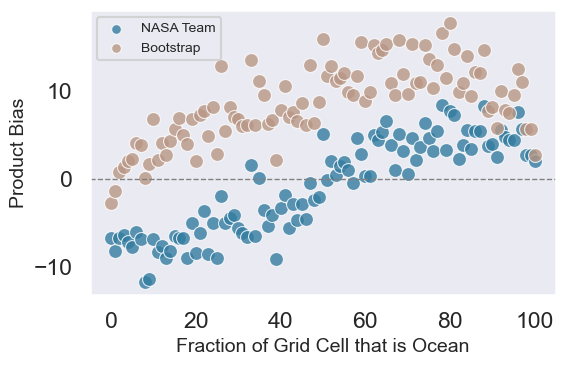

In [8]:
# ocean fraction vs error — this graph uses all the data

binned_ocean = data.copy()
binned_ocean['bin'] = (binned_ocean['ocean_fraction']).round().astype(int)
binned_ocean['bin2'] = (binned_ocean['ocean_fraction']).round().astype(int)

stratified_ocean = (
    binned_ocean
    .groupby('bin2', group_keys=False)
    .apply(lambda g: g.sample(min(200, len(g)), random_state=42), include_groups=False)
    .reset_index(drop=True)
)

# Bias by bin (Team)

bias_by_bin_team = stratified_ocean.groupby('bin').apply(
    lambda g: np.mean(g['team_icecon'] - g['visual_icecon'])
)

# Bias by bin (Bootstrap)

bias_by_bin_boot = stratified_ocean.groupby('bin').apply(
    lambda g: np.mean(g['bootstrap_icecon'] - g['visual_icecon'])
)

# Plot
sns.set_style("dark")
sns.set_context("talk")

fig, ax = plt.subplots(figsize=(6, 4))

# Team: blue
sns.scatterplot(
    x=bias_by_bin_team.index,
    y=bias_by_bin_team.values,
    s=100,
    color="#337CA0",
    edgecolor="w",
    alpha=0.8,
    label="NASA Team"
)

# Bootstrap: red
sns.scatterplot(
    x=bias_by_bin_boot.index,
    y=bias_by_bin_boot.values,
    s=100,
    color="#B89685", 
    edgecolor="w",
    alpha=0.8,
    label="Bootstrap"
)

ax.set_xlabel('Fraction of Grid Cell that is Ocean', fontsize=14)
ax.set_ylabel('Product Bias', fontsize=14)
ax.axhline(0, color='gray', linestyle='--', linewidth=1)
ax.legend(
    fontsize=10,
    markerscale=0.7,
    frameon=True,
    framealpha=0.8
)

plt.tight_layout()
plt.savefig("../figures/feature_scatter_plots/ocean.png", dpi=600, transparent=False)
plt.show()

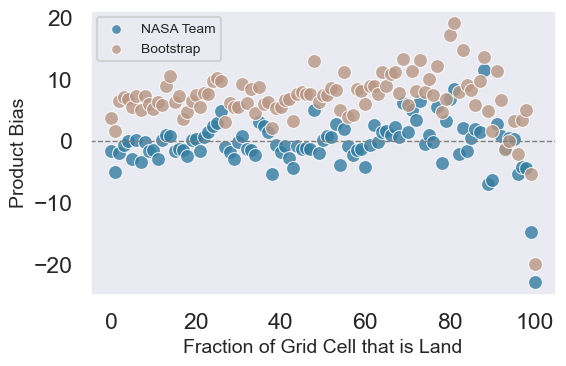

In [9]:
# land fraction vs error — this graph uses all the data

binned_land = data.copy()
binned_land['bin'] = (binned_land['land_fraction']).round().astype(int)
binned_land['bin2'] = (binned_land['land_fraction']).round().astype(int)

stratified_land = (
    binned_land
    .groupby('bin2', group_keys=False)
    .apply(lambda g: g.sample(min(200, len(g)), random_state=42), include_groups=False)
    .reset_index(drop=True)
)

# Bias by bin (Team)

bias_by_bin_team = stratified_land.groupby('bin').apply(
    lambda g: np.mean(g['team_icecon'] - g['visual_icecon'])
)

# Bias by bin (Bootstrap)

bias_by_bin_boot = stratified_land.groupby('bin').apply(
    lambda g: np.mean(g['bootstrap_icecon'] - g['visual_icecon'])
)

# Plot
sns.set_style("dark")
sns.set_context("talk")

fig, ax = plt.subplots(figsize=(6, 4))

# Team: blue
sns.scatterplot(
    x=bias_by_bin_team.index,
    y=bias_by_bin_team.values,
    s=100,
    color="#337CA0",
    edgecolor="w",
    alpha=0.8,
    label="NASA Team"
)

# Bootstrap: red
sns.scatterplot(
    x=bias_by_bin_boot.index,
    y=bias_by_bin_boot.values,
    s=100,
    color="#B89685", 
    edgecolor="w",
    alpha=0.8,
    label="Bootstrap"
)

ax.set_xlabel('Fraction of Grid Cell that is Land', fontsize=14)
ax.set_ylabel('Product Bias', fontsize=14)
ax.axhline(0, color='gray', linestyle='--', linewidth=1)
ax.legend(
    fontsize=10,
    markerscale=0.7,
    frameon=True,
    framealpha=0.8
)

plt.tight_layout()
plt.savefig("../figures/feature_scatter_plots/land.png", dpi=600, transparent=False)
plt.show()

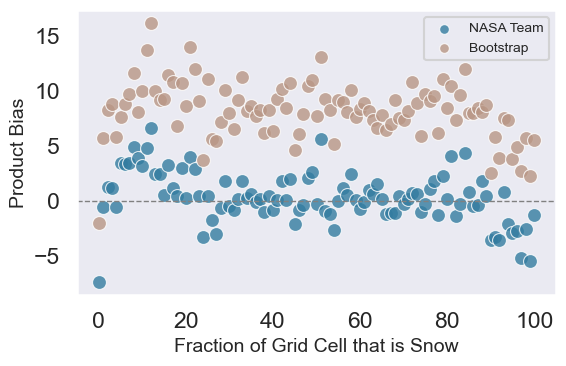

In [10]:
# snow fraction vs error — this graph uses all the data

binned_snow = data.copy()
binned_snow['bin'] = (binned_snow['snow_fraction']).round().astype(int)
binned_snow['bin2'] = (binned_snow['snow_fraction']).round().astype(int)

stratified_snow = (
    binned_snow
    .groupby('bin2', group_keys=False)
    .apply(lambda g: g.sample(min(200, len(g)), random_state=42), include_groups=False)
    .reset_index(drop=True)
)

# Bias by bin (Team)

bias_by_bin_team = stratified_snow.groupby('bin').apply(
    lambda g: np.mean(g['team_icecon'] - g['visual_icecon'])
)

# Bias by bin (Bootstrap)

bias_by_bin_boot = stratified_snow.groupby('bin').apply(
    lambda g: np.mean(g['bootstrap_icecon'] - g['visual_icecon'])
)

# Plot
sns.set_style("dark")
sns.set_context("talk")

fig, ax = plt.subplots(figsize=(6, 4))

# Team: blue
sns.scatterplot(
    x=bias_by_bin_team.index,
    y=bias_by_bin_team.values,
    s=100,
    color="#337CA0",
    edgecolor="w",
    alpha=0.8,
    label="NASA Team"
)

# Bootstrap: red
sns.scatterplot(
    x=bias_by_bin_boot.index,
    y=bias_by_bin_boot.values,
    s=100,
    color="#B89685", 
    edgecolor="w",
    alpha=0.8,
    label="Bootstrap"
)

ax.set_xlabel('Fraction of Grid Cell that is Snow', fontsize=14)
ax.set_ylabel('Product Bias', fontsize=14)
ax.axhline(0, color='gray', linestyle='--', linewidth=1)
ax.legend(
    fontsize=10,
    markerscale=0.7,
    frameon=True,
    framealpha=0.8
)

plt.tight_layout()
plt.savefig("../figures/feature_scatter_plots/snow.png", dpi=600, transparent=False)
plt.show()

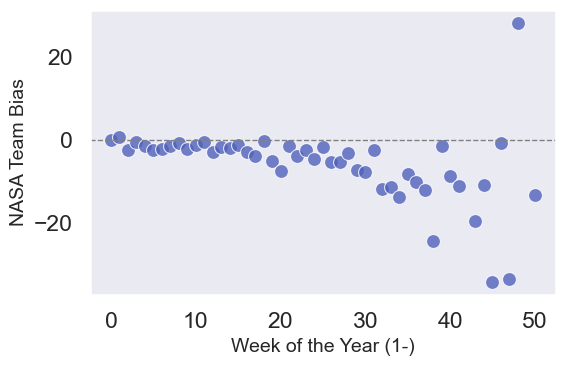

In [11]:
# day of year vs error — full data

binned_time = data.copy()
binned_time['bin'] = ((binned_time['date'].dt.day*binned_time['date'].dt.month)/7).round().astype(int)
binned_time['bin2'] = ((binned_time['date'].dt.day*binned_time['date'].dt.month)/7).round().astype(int)

stratified_distance = (binned_time
    .groupby('bin2', group_keys=False)
    .apply(lambda g: g.sample(min(10000, len(g)), random_state=42), include_groups=False)
    .reset_index(drop=True)
)

# bias by bin

bias_by_bin = stratified_distance.groupby('bin').apply(
    lambda g: np.mean(g['team_icecon'] - g['visual_icecon'])
)
sns.set_style("dark")
sns.set_context("talk")

# Create scatter plot
fig, ax = plt.subplots(figsize=(6, 4))
sns.scatterplot(
    x=bias_by_bin.index, 
    y=bias_by_bin.values, 
    s=100,
    color="#5161bb",
    edgecolor="w",
    alpha=0.8
)

ax.set_xlabel('Week of the Year (1-)', fontsize=14)
ax.set_ylabel('NASA Team Bias', fontsize=14)
ax.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()


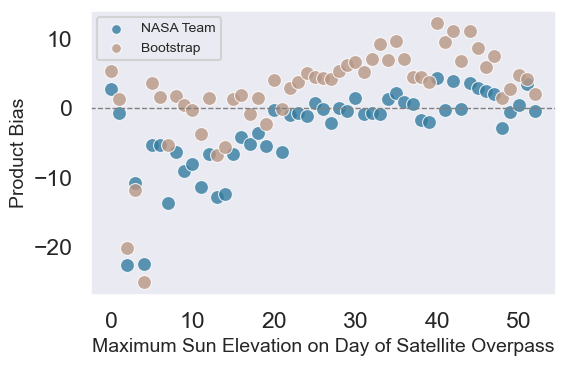

In [12]:
# sun elevation vs error — this graph uses all the data

binned_sun = data.copy()
binned_sun['bin'] = (binned_sun['sun_elevation']).round().astype(int)
binned_sun['bin2'] = (binned_sun['sun_elevation']).round().astype(int)

stratified_sun = (
    binned_sun
    .groupby('bin2', group_keys=False)
    .apply(lambda g: g.sample(min(200, len(g)), random_state=42), include_groups=False)
    .reset_index(drop=True)
)

# Bias by bin (Team)

bias_by_bin_team = stratified_sun.groupby('bin').apply(
    lambda g: np.mean(g['team_icecon'] - g['visual_icecon'])
)

# Bias by bin (Bootstrap)

bias_by_bin_boot = stratified_sun.groupby('bin').apply(
    lambda g: np.mean(g['bootstrap_icecon'] - g['visual_icecon'])
)

# Plot
sns.set_style("dark")
sns.set_context("talk")

fig, ax = plt.subplots(figsize=(6, 4))

# Team: blue
sns.scatterplot(
    x=bias_by_bin_team.index,
    y=bias_by_bin_team.values,
    s=100,
    color="#337CA0",
    edgecolor="w",
    alpha=0.8,
    label="NASA Team"
)

# Bootstrap: red
sns.scatterplot(
    x=bias_by_bin_boot.index,
    y=bias_by_bin_boot.values,
    s=100,
    color="#B89685", 
    edgecolor="w",
    alpha=0.8,
    label="Bootstrap"
)

ax.set_xlabel('Maximum Sun Elevation on Day of Satellite Overpass', fontsize=14)
ax.set_ylabel('Product Bias', fontsize=14)
ax.axhline(0, color='gray', linestyle='--', linewidth=1)
ax.legend(
    fontsize=10,
    markerscale=0.7,
    frameon=True,
    framealpha=0.8
)

plt.tight_layout()
plt.savefig("../figures/feature_scatter_plots/sun_elevation.png", dpi=600, transparent=False)
plt.show()

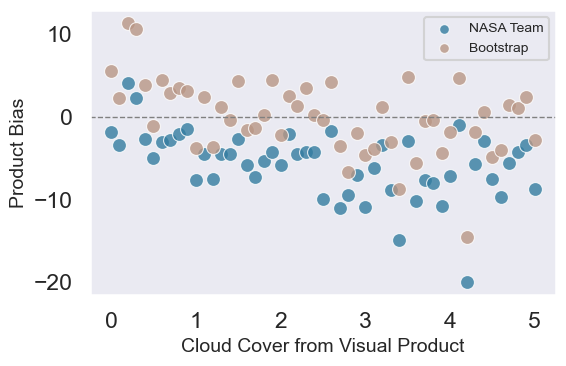

In [13]:
# cloud cover vs error — this graph uses all the data

binned_cloud = data.copy()
binned_cloud['bin'] = (binned_cloud['cloud_cover']).round(1).astype(float)
binned_cloud['bin2'] = (binned_cloud['cloud_cover']).round(1).astype(float)

stratified_cloud = (
    binned_cloud
    .groupby('bin2', group_keys=False)
    .apply(lambda g: g.sample(min(200, len(g)), random_state=42), include_groups=False)
    .reset_index(drop=True)
)

# Bias by bin (Team)

bias_by_bin_team = stratified_cloud.groupby('bin').apply(
    lambda g: np.mean(g['team_icecon'] - g['visual_icecon'])
)

# Bias by bin (Bootstrap)

bias_by_bin_boot = stratified_cloud.groupby('bin').apply(
    lambda g: np.mean(g['bootstrap_icecon'] - g['visual_icecon'])
)

# Plot
sns.set_style("dark")
sns.set_context("talk")

fig, ax = plt.subplots(figsize=(6, 4))

# Team: blue
sns.scatterplot(
    x=bias_by_bin_team.index,
    y=bias_by_bin_team.values,
    s=100,
    color="#337CA0",
    edgecolor="w",
    alpha=0.8,
    label="NASA Team"
)

# Bootstrap: red
sns.scatterplot(
    x=bias_by_bin_boot.index,
    y=bias_by_bin_boot.values,
    s=100,
    color="#B89685", 
    edgecolor="w",
    alpha=0.8,
    label="Bootstrap"
)

ax.set_xlabel('Cloud Cover from Visual Product', fontsize=14)
ax.set_ylabel('Product Bias', fontsize=14)
ax.axhline(0, color='gray', linestyle='--', linewidth=1)
ax.legend(
    fontsize=10,
    markerscale=0.7,
    frameon=True,
    framealpha=0.8
)

plt.tight_layout()
plt.savefig("../figures/feature_scatter_plots/cloud_cover.png", dpi=600, transparent=False)
plt.show()

In [14]:
# core statistics on full data team

print("correlations table")
print(data[['visual_icecon', 'team_icecon']].corr())

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(data['visual_icecon'], data['team_icecon'])
print()
print(f"mean absolute error is {mae}")
print()
print('big correlation matrix table')
corr = data[['team_error', 'cloud_cover', 'snow_fraction', 'ocean_fraction', 'land_fraction', 'edtl', 'sun_elevation']].corr()
corr_bootstrap = data[['bootstrap_error', 'cloud_cover', 'snow_fraction', 'ocean_fraction', 'land_fraction', 'edtl', 'sun_elevation']].corr()
print(corr)


correlations table
               visual_icecon  team_icecon
visual_icecon       1.000000     0.863091
team_icecon         0.863091     1.000000

mean absolute error is 12.326930254340924

big correlation matrix table
                team_error  cloud_cover  snow_fraction  ocean_fraction  \
team_error        1.000000    -0.092673       0.058448        0.203624   
cloud_cover      -0.092673     1.000000      -0.128353        0.192267   
snow_fraction     0.058448    -0.128353       1.000000       -0.407057   
ocean_fraction    0.203624     0.192267      -0.407057        1.000000   
land_fraction     0.045246     0.044996       0.058342       -0.244762   
edtl             -0.142192     0.037087      -0.220142        0.096225   
sun_elevation     0.165740    -0.082318      -0.087595        0.123799   

                land_fraction      edtl  sun_elevation  
team_error           0.045246 -0.142192       0.165740  
cloud_cover          0.044996  0.037087      -0.082318  
snow_fraction     

In [15]:
# core statistics on full data bootstrap

print("bootstrap correlations table")
print(data[['visual_icecon', 'bootstrap_icecon']].corr())

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(data['visual_icecon'], data['bootstrap_icecon'])
print()
print(f"mean absolute error is {mae}")
print()
print('big correlation matrix table')
corr_bootstrap = data[['bootstrap_error', 'cloud_cover', 'snow_fraction', 'ocean_fraction', 'land_fraction', 'edtl', 'sun_elevation']].corr()
print(corr_bootstrap)

bootstrap correlations table
                  visual_icecon  bootstrap_icecon
visual_icecon          1.000000          0.841763
bootstrap_icecon       0.841763          1.000000

mean absolute error is 13.253179517511754

big correlation matrix table
                 bootstrap_error  cloud_cover  snow_fraction  ocean_fraction  \
bootstrap_error         1.000000    -0.098660       0.085887        0.104979   
cloud_cover            -0.098660     1.000000      -0.128353        0.192267   
snow_fraction           0.085887    -0.128353       1.000000       -0.407057   
ocean_fraction          0.104979     0.192267      -0.407057        1.000000   
land_fraction           0.057592     0.044996       0.058342       -0.244762   
edtl                   -0.147848     0.037087      -0.220142        0.096225   
sun_elevation           0.125152    -0.082318      -0.087595        0.123799   

                 land_fraction      edtl  sun_elevation  
bootstrap_error       0.057592 -0.147848       0.

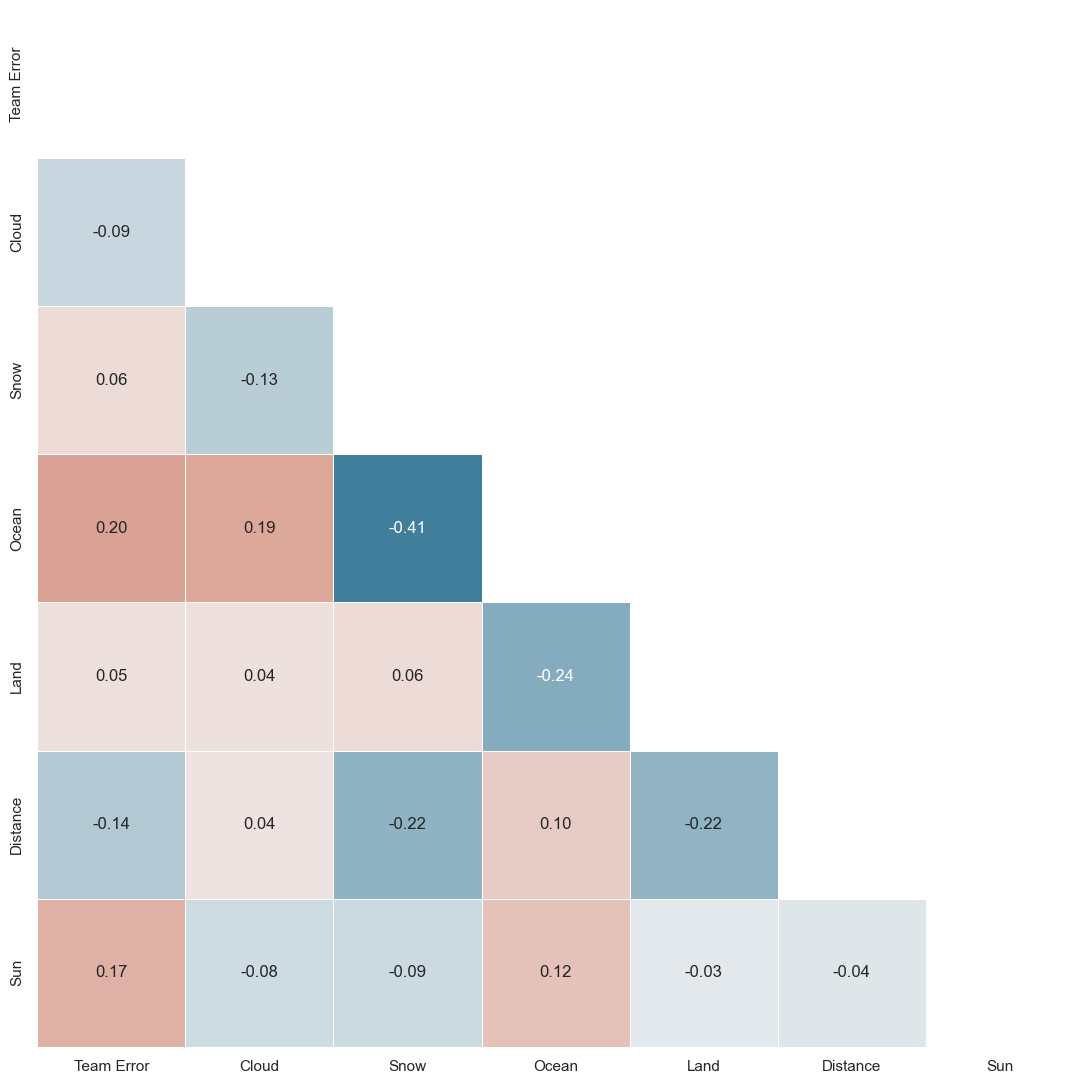

In [16]:
# correlation matrix team
sns.set_theme(style="white")

#rename some variables for plotting
rename_map = {
    "team_error": "Team Error",
    "edtl": "Distance",
    "ocean_fraction":"Ocean",
    "land_fraction":"Land",
    "snow_fraction": "Snow",
    "cloud_cover": "Cloud",
    "sun_elevation": "Sun",
    "visual": "Ice Conc",
}
corr = corr.rename(index=rename_map, columns=rename_map)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
ax = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                annot=True, fmt=".2f",
                square=True, linewidths=.5,
                cbar = False)
plt.tight_layout()
plt.savefig("../figures/correlation/corr_team.png", dpi=600, transparent=True)
plt.show()

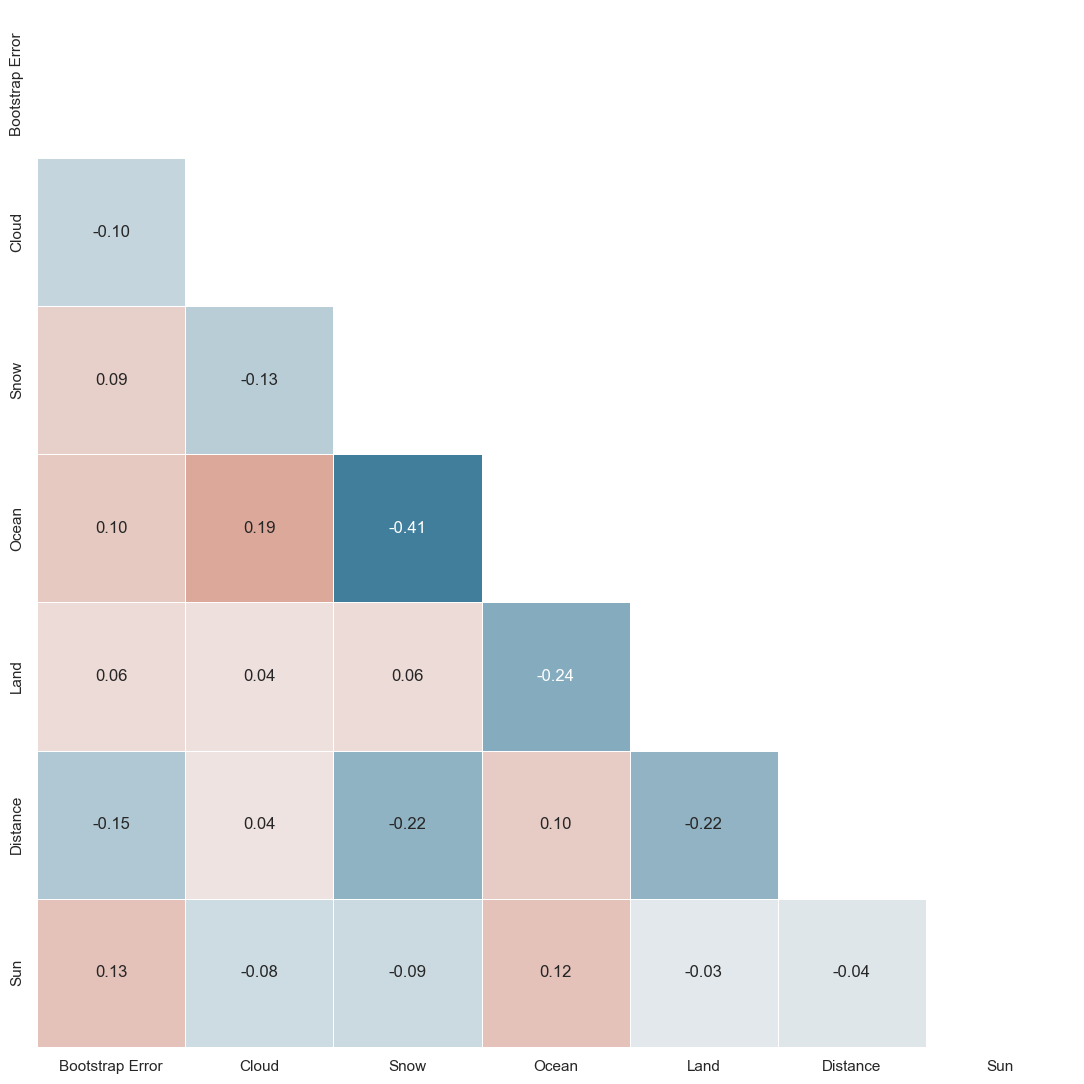

In [17]:
# correlation matrix bootstrap
sns.set_theme(style="white")

#rename some variables for plotting
rename_map_bootstrap = {
    "bootstrap_error": "Bootstrap Error",
    "edtl": "Distance",
    "ocean_fraction":"Ocean",
    "land_fraction":"Land",
    "snow_fraction": "Snow",
    "cloud_cover": "Cloud",
    "sun_elevation": "Sun",
    "visual": "Ice Conc",
}
corr_bootstrap = corr_bootstrap.rename(index=rename_map_bootstrap, columns=rename_map_bootstrap)

# Generate a mask for the upper triangle
mask_bootstrap = np.triu(np.ones_like(corr_bootstrap, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
ax = sns.heatmap(corr_bootstrap, mask=mask_bootstrap, cmap=cmap, vmax=.3, center=0,
                annot=True, fmt=".2f",
                square=True, linewidths=.5,
                cbar = False)

plt.tight_layout()

# Save figure with transparent background
plt.savefig("../figures/correlation/corr_bootstrap.png", dpi=600, transparent=True)
plt.show()


This second section gets into spatial autocorrelation but also serves to show where we have data

In [ ]:
sns.set_style("darkgrid")
sns.despine()

# --- Background: Mean Sea Ice Concentration ---
ds_subset = ds.where(ds.team_icecon < 1.01)
sic_mean = ds_subset.team_icecon.mean(dim="time")

fig, ax = plt.subplots(figsize=(8, 8))

sic_plot = sic_mean.plot(
    ax=ax,
    cmap=cmap,
    cbar_kwargs={'label': 'Mean Sea Ice Concentration'},
    add_labels=False
)

# --- Overlay: Mean TEAM Error ---
agg = data.groupby(['row', 'col'], as_index=False)['team_error'].mean()
heatmap = agg.pivot(index='row', columns='col', values='team_error')

error_im = ax.imshow(
    heatmap,
    origin='upper',
    cmap='coolwarm',
    alpha=0.45,          # transparency for map feel
    interpolation='none'
)

cbar_err = plt.colorbar(
    error_im,
    ax=ax,
    fraction=0.046,
    pad=0.04
)
cbar_err.set_label('Mean TEAM Error')

# --- Axis / Title formatting ---
ax.set_title("Mean PMW Sea Ice Concentration (2023)\nwith TEAM Algorithm Error Overlay")
ax.set_xlabel("NSIDC Column (25 km)")
ax.set_ylabel("NSIDC Row (25 km)")
ax.invert_yaxis()

plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

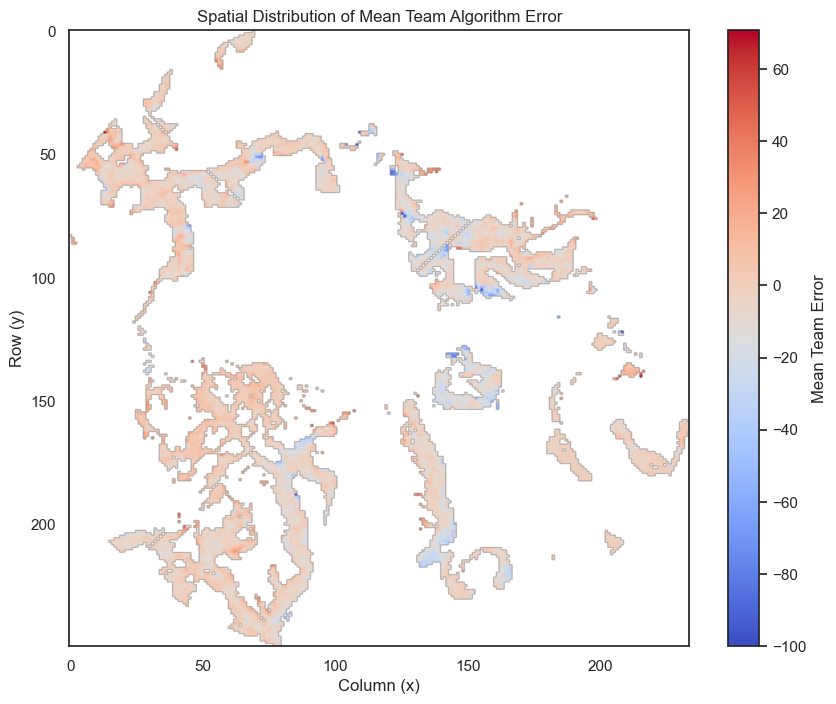

In [ ]:

agg = data.groupby(['row', 'col'], as_index=False)['team_error'].mean()

plt.figure(figsize=(8, 6))
heatmap = agg.pivot(index='row', columns='col', values='team_error')

plt.figure(figsize=(10, 8))
plt.imshow(
    heatmap, 
    origin='upper',
    cmap='coolwarm', 
    aspect='auto'
)
plt.colorbar(label='Mean Team Error')
plt.title('Spatial Distribution of Mean Team Algorithm Error')
plt.xlabel('Column (x)')
plt.ylabel('Row (y)')
plt.show()

Lastly this section makes large plots

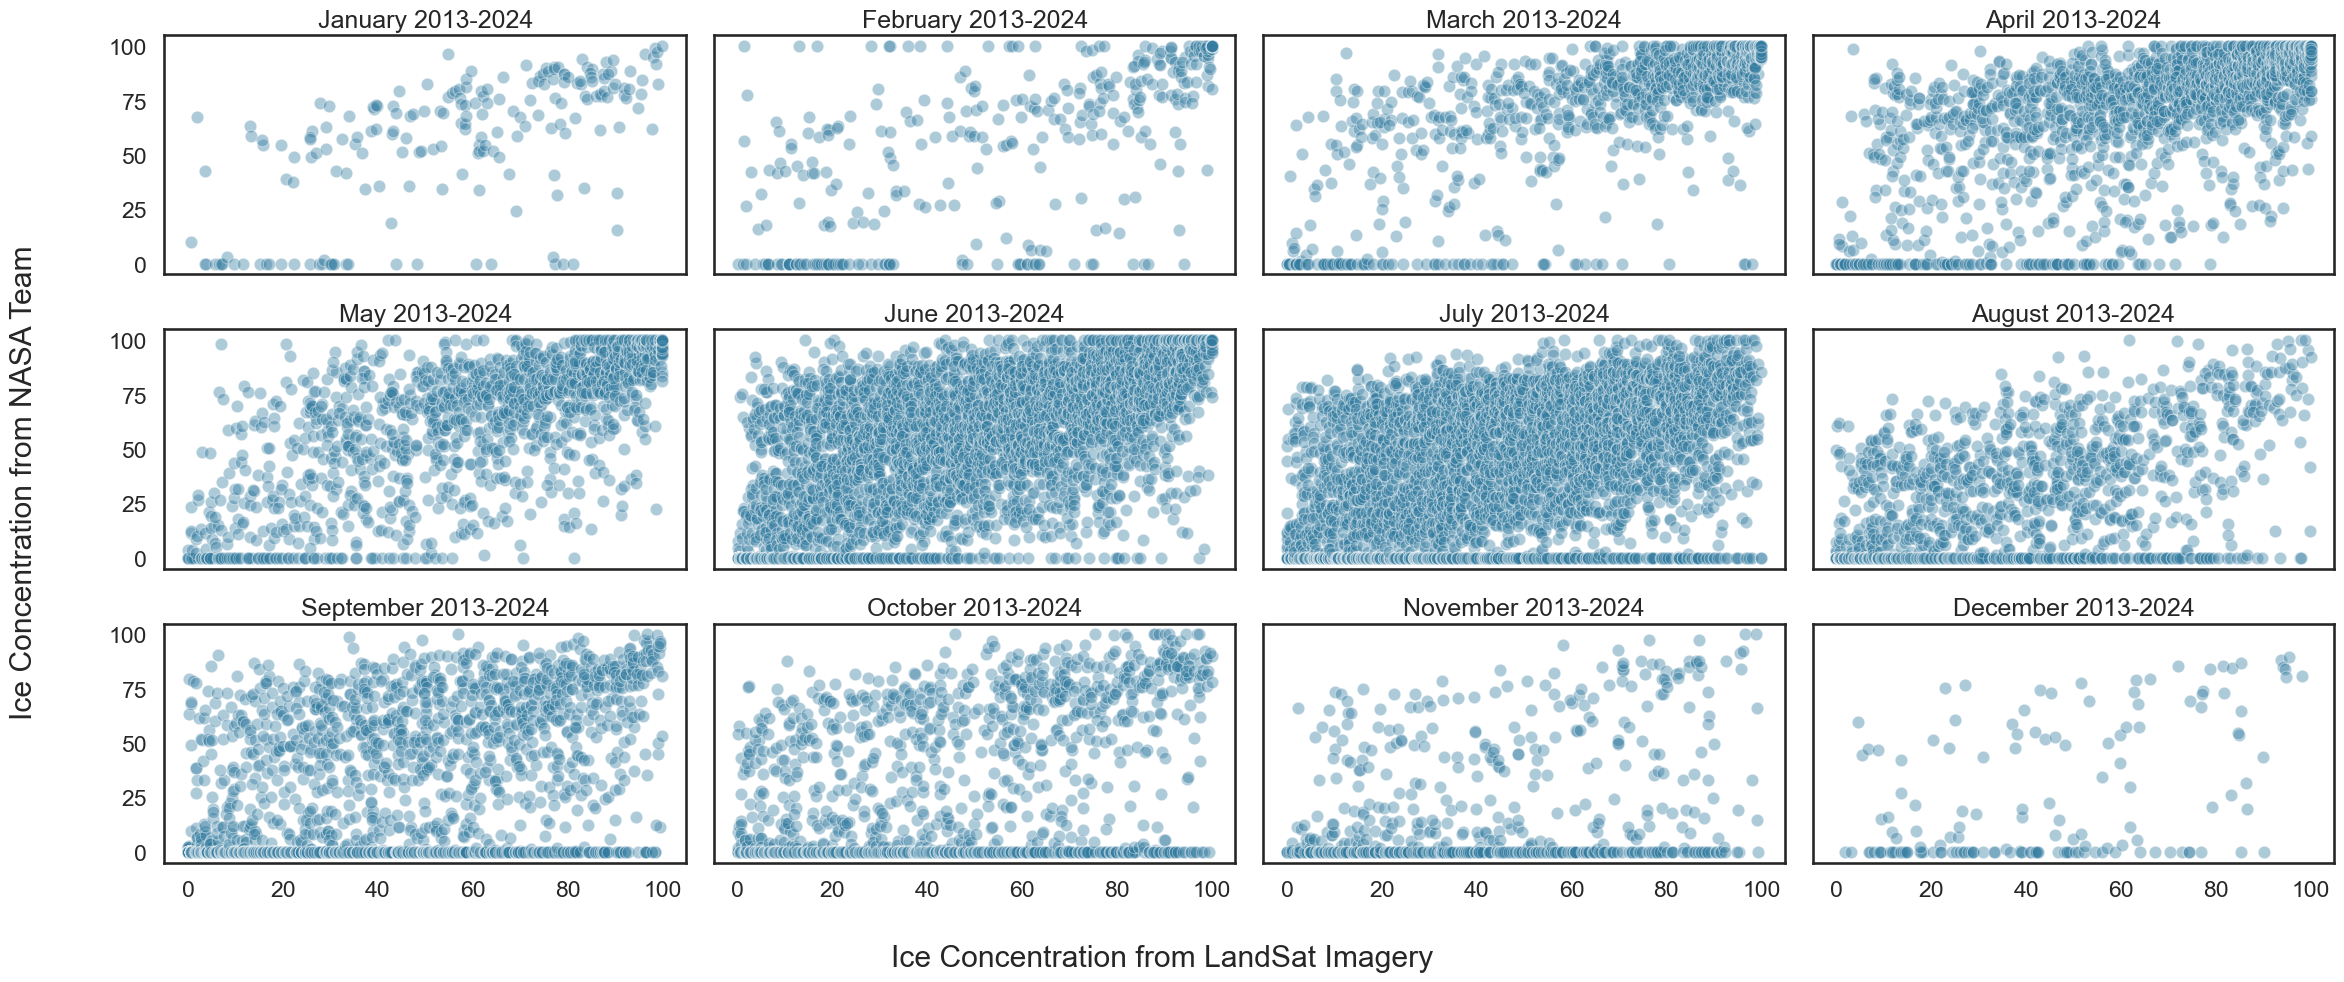

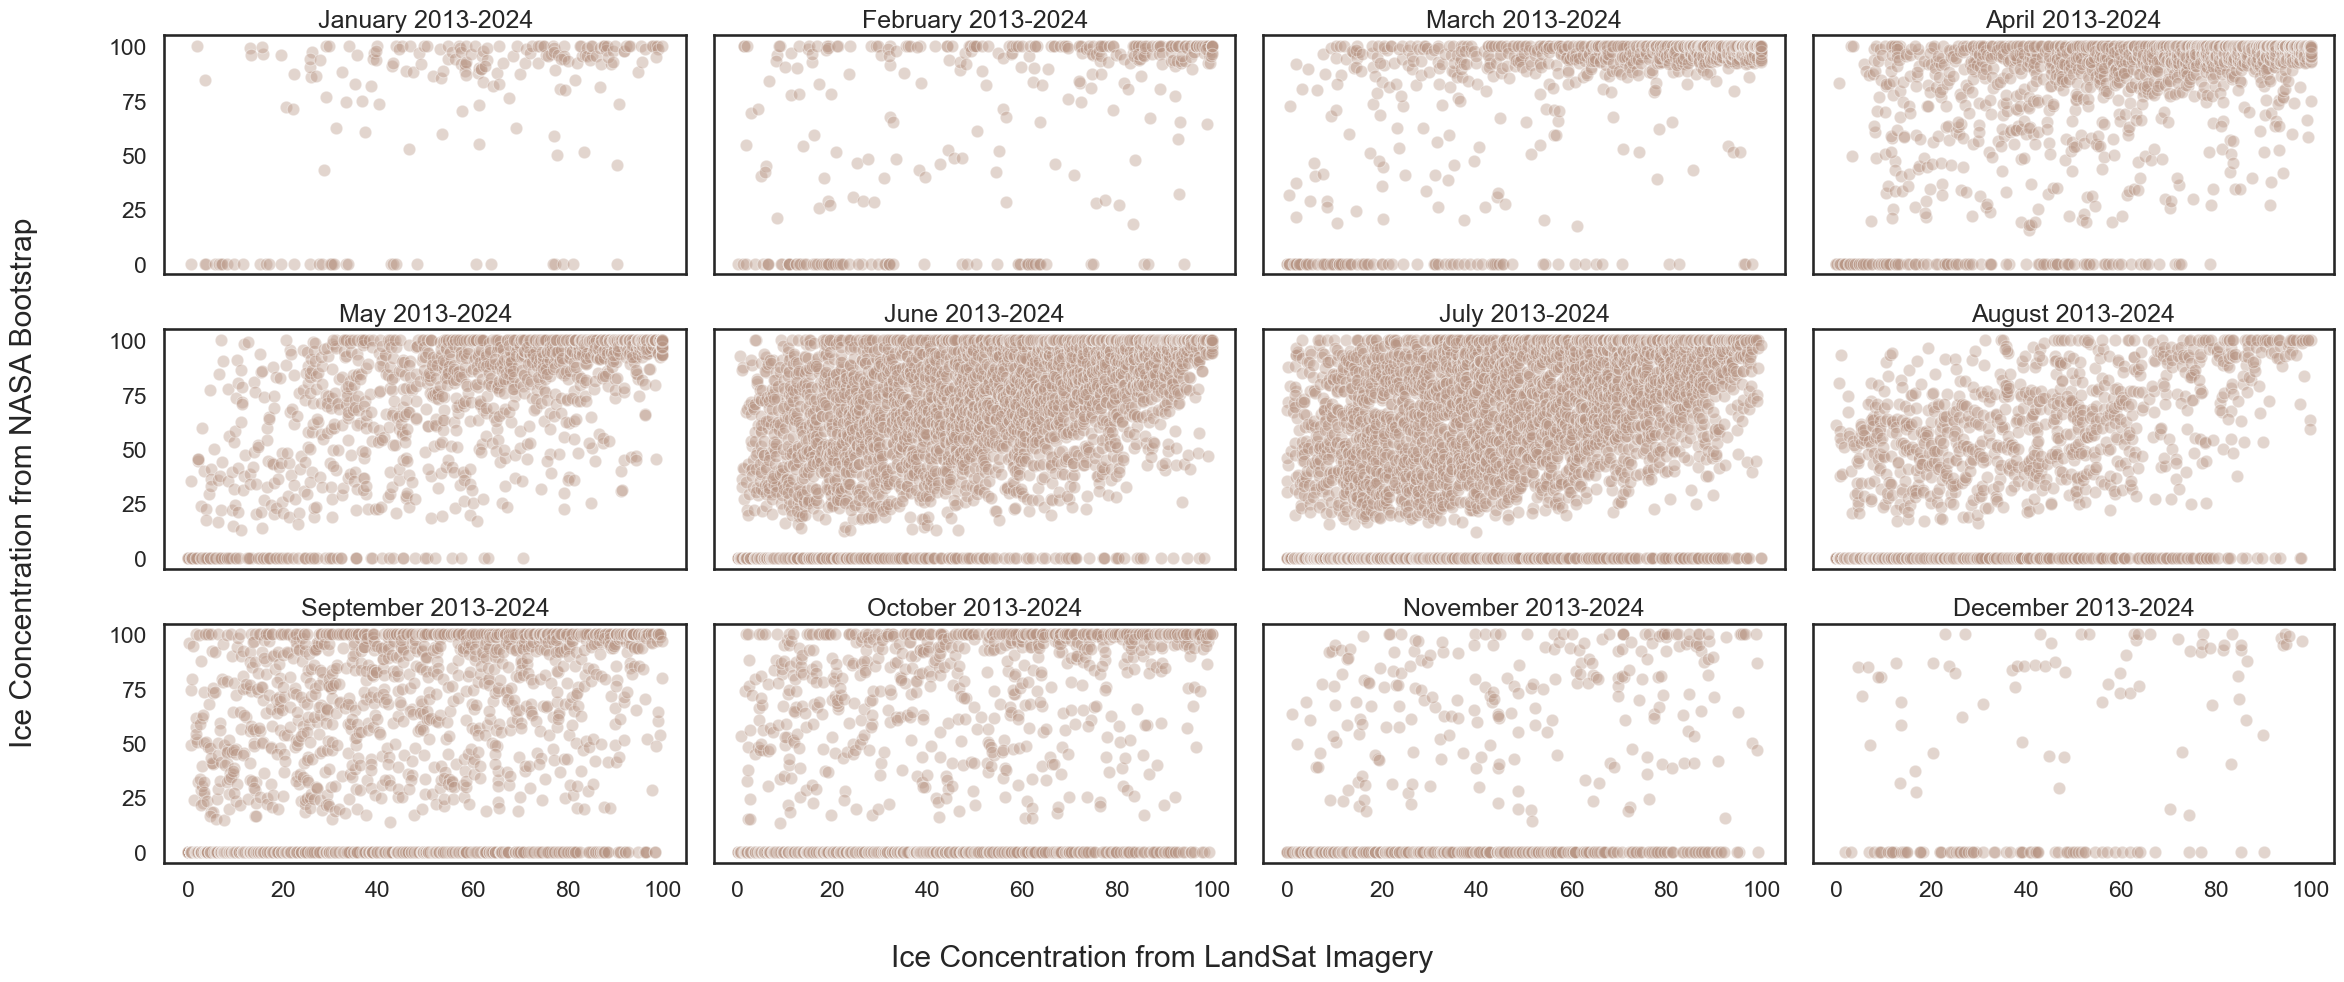

In [19]:
## PLOT FOR ALL MONTHS

sns.set_context('talk')
sns.set_style("white")
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
fig, axes = plt.subplots(3, 4, figsize=(24, 10),sharex=True, sharey=True)
axes = axes.flatten()

# loop through months

for month in range(1, 13):
    ax = axes[month - 1]
    data_month = stratified.loc[stratified['date'].dt.month == month]
    sns.scatterplot(
        data=data_month,
        x='visual_icecon',
        y= 'team_icecon',
        color='#337CA0',
        alpha=0.4,
        ax=ax
    )
    ax.set_title(f'{months[month -1]} 2013-2024')
    ax.set_xlabel('')
    ax.set_ylabel('')

    ax.set_xlim(-5, 105)
    ax.set_ylim(-5, 105)


# edit shared labels and title

fig.supxlabel('Ice Concentration from LandSat Imagery')
fig.supylabel('Ice Concentration from NASA Team\n \n ')
plt.tight_layout()
plt.savefig("../figures/pmw_visual_scatters/team.png", dpi=600, transparent=False)
plt.show()
plt.close()

fig, axes = plt.subplots(3, 4, figsize=(24, 10),sharex=True, sharey=True)
axes = axes.flatten()

# loop through months

for month in range(1, 13):
    ax = axes[month - 1]
    data_month = stratified.loc[stratified['date'].dt.month == month]
    sns.scatterplot(
        data=data_month,
        x='visual_icecon',
        y= 'bootstrap_icecon',
        color='#B89685',
        alpha=0.4,
        ax=ax
    )
    ax.set_title(f'{months[month -1]} 2013-2024')
    ax.set_xlabel('')
    ax.set_ylabel('')

    ax.set_xlim(-5, 105)
    ax.set_ylim(-5, 105)


# edit shared labels and title

fig.supxlabel('Ice Concentration from LandSat Imagery')
fig.supylabel('Ice Concentration from NASA Bootstrap\n \n ')
plt.tight_layout()
plt.savefig("../figures/pmw_visual_scatters/bootstrap.png", dpi=600, transparent=False)
plt.show()